# Data Preprocessing

In [2]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from catboost import CatBoostClassifier
import ipywidgets  

In [3]:
# Membaca dataset dari file csv
data = pd.read_csv('garments_worker_productivity.csv')

# Menampilkan 5 data pertama
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Check Missing Value

In [4]:
# Cek data yang hilang
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [5]:
# Isi missing values dengan median
data['wip'] = data['wip'].fillna(data['wip'].median())

In [6]:
# Cek kembali
data.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

## Check Department

In [7]:
# Mengecek jumlah tiap departement
data['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [8]:
# Cek kenapa finishin bisa double, mungkin ada perbedaan penulisan
print(data['department'].unique())

['sweing' 'finishing ' 'finishing']


In [9]:
# Buat semua data department menggunakan huruf kecil dan tidak ada spasi sebelum atau setelahnya
data['department'] = data['department'].str.lower().str.strip()

In [10]:
# Mengecek kembali
print(data['department'].value_counts())

department
sweing       691
finishing    506
Name: count, dtype: int64


In [11]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Categorical Features

In [12]:
# Kolom kategori
categorical_features = ['day', 'department', 'quarter']  

In [13]:
# Buat kategori untuk standard minute value
# kategorikan dari low, medium, hingga high
data['smv_category'] = pd.cut(data['smv'], bins=[0, 20, 30, 100], labels=['low', 'medium', 'high'])

# Masukan ke fitur kategori
categorical_features.append('smv_category')  

In [14]:
# Cek missing values di kolom kategorikal
print(data[categorical_features].isnull().sum())

day             0
department      0
quarter         0
smv_category    0
dtype: int64


In [15]:
for col in categorical_features:
    data[col] = data[col].fillna(data[col].mode()[0])

In [16]:
# Convert ke string 
data[categorical_features] = data[categorical_features].astype(str)
data[categorical_features].dtypes

day             object
department      object
quarter         object
smv_category    object
dtype: object

In [17]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,smv_category
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,medium
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,low
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,low
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,low
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,medium


## Check Duplicate Data

In [18]:
# Cek data yang terduplikat
data.duplicated().sum()

0

In [19]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,smv_category
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,medium
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,low
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,low
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,low
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,medium


Tidak ada yang terduplikat.

## Productivity Target

In [20]:
# Buat target produktivitas
threshold = data['actual_productivity'].median() 
data['target'] = (data['actual_productivity'] >= threshold).astype(int)

In [37]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,smv_category,target
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,medium,1
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,low,1
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,low,1
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,low,1
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,medium,1


In [38]:
print(data['target'].value_counts())

target
1    599
0    598
Name: count, dtype: int64


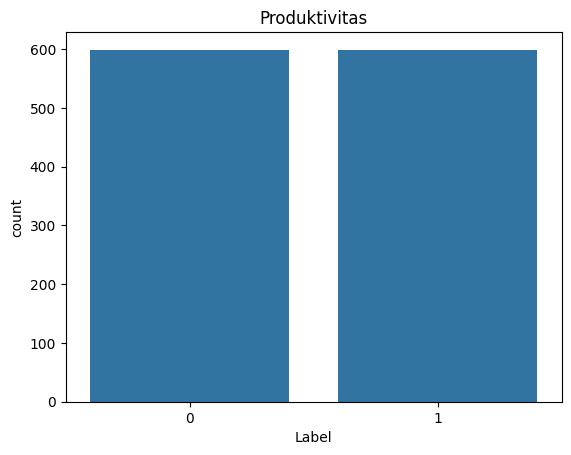

In [21]:
plt.title('Produktivitas')
sns.countplot(x=data['target'], data=data)
plt.xlabel('Label')
plt.show()

In [22]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,smv_category,target
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,medium,1
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,low,1
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,low,1
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,low,1
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,medium,1


## Save Preprocessed Data

In [23]:
# Save hasil Preprocessing ke file csv
data.to_csv('Preprocessed_garments_worker_productivity.csv', index=False)

# Buka data yang sudah di save tadi
data = pd.read_csv('Preprocessed_garments_worker_productivity.csv')
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,smv_category,target
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,medium,1
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,low,1
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,low,1
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,low,1
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,medium,1


## Data Modelling

In [24]:
# Pisahkan fitur dan target
X = data.drop(['date', 'actual_productivity', 'target'], axis=1)
y = data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# kolom kategorikal
cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_features]

# Hyperparameter CatBoost
model = CatBoostClassifier(
    iterations=500, #pohon iterasi sampai 500 kali, cek pola 
    learning_rate=0.05, #model belajar pelan-pelan
    depth=6, #dalamnya pohon untuk waktu dan kompleksnya training
    cat_features=cat_features_indices, #auto handle fitur kategori, native support
    verbose=100,  #log tiap 100 iterasi, cek proses training
    random_state=42, 
    eval_metric='Accuracy'
)

In [26]:
# Visualisasi training
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7701149	test: 0.7166667	best: 0.7166667 (0)	total: 164ms	remaining: 1m 22s
100:	learn: 0.9132706	test: 0.8500000	best: 0.8500000 (44)	total: 3.12s	remaining: 12.3s
200:	learn: 0.9414838	test: 0.8500000	best: 0.8625000 (132)	total: 7.9s	remaining: 11.8s
300:	learn: 0.9561129	test: 0.8583333	best: 0.8750000 (231)	total: 11.1s	remaining: 7.36s
400:	learn: 0.9759666	test: 0.8416667	best: 0.8750000 (231)	total: 14.6s	remaining: 3.6s
499:	learn: 0.9874608	test: 0.8500000	best: 0.8750000 (231)	total: 18.3s	remaining: 0us

bestTest = 0.875
bestIteration = 231

Shrink model to first 232 iterations.


Hasil Metrik Evaluasi
----------------------
Accuracy: 0.875
F1-Score: 0.8728813559322034
Recall: 0.8583333333333333
Precision: 0.8879310344827587


Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       120
           1       0.89      0.86      0.87       120

    accuracy                           0.88       240
   macro avg       0.88      0.88      0.87       240
weighted avg       0.88      0.88      0.87       240



Confusion Matrix
-----------------------


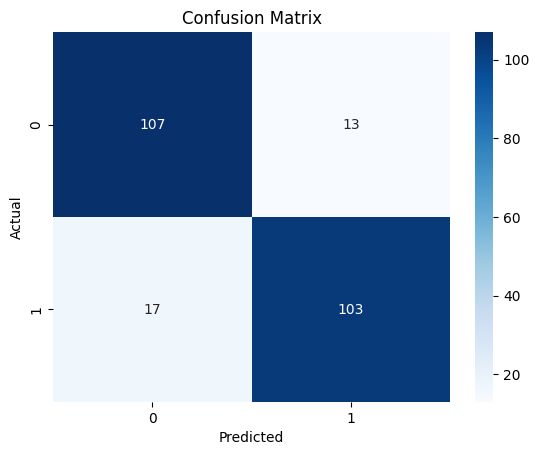

In [27]:
# Prediksi
y_pred = model.predict(X_test)

# Akurasi, F1-Score, Precision, Recall
print('Hasil Metrik Evaluasi')
print('----------------------')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1-Score: {f1_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')

# Classification Report
print('\n')
print('Classification Report')
print('-----------------------')
print(classification_report(y_test, y_pred))

# Confusion Matrix
print('\n')
print('Confusion Matrix')
print('-----------------------')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# save model
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)

## Testing

### Read model

In [29]:
# baca model
with open('trained_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [30]:
data.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'smv_category', 'target'],
      dtype='object')

### Add new Data

In [31]:
# tambah data baru
new_team = pd.DataFrame({
    'date': ['06-15-2023'],
    'day': ['Thursday'],
    'quarter': ['Q2'],
    'department': ['sewing'],
    'team': [3],
    'no_of_workers': [8],
    'no_of_style_change': [1],
    'targeted_productivity': [0.85],
    'smv': [30],
    'wip': [1108],
    'over_time': [7080],
    'incentive': [60],
    'idle_time': [5],
    'idle_men': [0]
})

### Preprocessing data

In [32]:
# Ubah menjadi huruf kecil dan menghilangkan spasi sebelum serta sesudah departemen 
new_team['department'] = new_team['department'].str.lower().str.strip()

# Tambah kategori low, medium, high pada smv
# karna smv yang di data baru 70, maka jaraknya kita perbesar lagi sampe ke 100
new_team['smv_category'] = pd.cut(new_team['smv'], bins=[0, 20, 30, 100], labels=['low', 'medium', 'high'])


### Actual Productivity Prediction

In [33]:
# prediksi dengan model yang sudah di load tadi
predicted_productivity = model.predict(new_team.drop(['date'], axis=1))[0]

### Productivity Classification

In [34]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,smv_category,target
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,medium,1
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,low,1
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,low,1
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,low,1
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,medium,1


In [35]:
# set threshold produktivitas (kami ambil dari mean actual_productivity yang ada di EDA)
productivity_threshold = 0.73 
# Validasi produktif atau tidak
is_productive = "Produktif" if predicted_productivity >= productivity_threshold else "Tidak Produktif"
probability = predicted_productivity if is_productive == "Produktif" else (1 - predicted_productivity)

## Result Testing

In [36]:
print(f"Analisis Produktivitas Tim {new_team['team'].values[0]}")
print("-------------------------------------------------")
print(f"Tanggal           : {new_team['date'].values[0]}")
print(f"Departemen        : {new_team['department'].values[0].title()}")
print(f"Nomor Tim         : {new_team['team'].values[0]}")
print(f"SMV               : {new_team['smv'].values[0]} (Kategori: {new_team['smv_category'].values[0]})")
print(f"Lembur            : {new_team['over_time'].values[0]} menit")
print(f"Idle Time         : {new_team['idle_time'].values[0]} menit")
print('\n')
print(f"Hasil Prediksi Produktivitas Tim {new_team['team'].values[0]}")
print("----------------------------------------------------")
print(f"Produktivitas        : {predicted_productivity:.2%}")
print(f"Klasifikasi          : {is_productive}")
print(f"Tingkat Keyakinan    : {probability:.1%}")
print('\n')
print("Hal yang perlu dilakukan oleh HRD")
print("----------------------------------------")
if is_productive == "Produktif":
    print("1. Insentif sudah baik dan boleh ditambahkan atau dipertahankan.")
    print("2. Tim lain perlu mencontoh.")
    if new_team['over_time'].values[0] > 120:
        print("3. Lembur terlalu banyak, lebih diperhatikan agar tidak terjadi burnout.")
else:
    print("1. Cek saat pegawai ada waktu menganggur.")
    print("2. Cek alokasi pegawai.")
    if new_team['smv_category'].values[0] == 'high':
        print("-> SMV terlalu tinggi, pertimbangkan breakdown tugas")
    if new_team['incentive'].values[0] < 50:
        print("-> Tingkatkan insentif untuk motivasi tim")
print('\n')
# Data lengkap 
print(f"Detail Data Tim {new_team['team'].values[0]}")
print("-------------------------------------------------")
print(new_team.drop('date', axis=1).T.to_string(header=False))

Analisis Produktivitas Tim 3
-------------------------------------------------
Tanggal           : 06-15-2023
Departemen        : Sewing
Nomor Tim         : 3
SMV               : 30 (Kategori: medium)
Lembur            : 7080 menit
Idle Time         : 5 menit


Hasil Prediksi Produktivitas Tim 3
----------------------------------------------------
Produktivitas        : 100.00%
Klasifikasi          : Produktif
Tingkat Keyakinan    : 100.0%


Hal yang perlu dilakukan oleh HRD
----------------------------------------
1. Insentif sudah baik dan boleh ditambahkan atau dipertahankan.
2. Tim lain perlu mencontoh.
3. Lembur terlalu banyak, lebih diperhatikan agar tidak terjadi burnout.


Detail Data Tim 3
-------------------------------------------------
day                    Thursday
quarter                      Q2
department               sewing
team                          3
no_of_workers                 8
no_of_style_change            1
targeted_productivity      0.85
smv               